### OBJECTIVE
Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

1-The assignment is to build a predictive model to determine if a building will have an insurance claim during a certain period.
2-predict the probability of having at least one claim over the insured period of the building.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [113]:
df=pd.read_csv('train_data.csv')

In [114]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [115]:
data_dictionary=pd.read_csv('VariableDescription.csv')

In [116]:
data_dictionary

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


### Data Profiling

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [119]:
df.shape

(7160, 14)

In [120]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

### DATA CLEANING 

In [122]:
#model encoding
df['Building_Painted'] = df['Building_Painted'].replace({'V' : 0, 'N' : 1})
df['Building_Fenced'] = df['Building_Fenced'].replace({'V' : 0,  'N' : 1})
df['Garden'] = df['Garden'].replace({'O' : 0,  'V' : 1})
df['Settlement'] = df['Settlement'].replace({'R' : 0, 'U' : 1 })

In [123]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1053,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7153 non-null   float64
 7   Settlement          7160 non-null   int64  
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 783.3+ KB


In [125]:
df.duplicated().sum()

0

In [126]:
df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [127]:
###change datatypes
df['NumberOfWindows']=df['NumberOfWindows'].str.replace('.', 'NaN')


In [128]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,NaN,1053,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,NaN,1053,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,NaN,1053,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1053,0


In [129]:
df['NumberOfWindows'] = df['NumberOfWindows'].astype('float64')


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7153 non-null   float64
 7   Settlement          7160 non-null   int64  
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     3609 non-null   float64
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 783.3+ KB


In [131]:
df.isnull().sum()

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   7
Settlement               0
Building Dimension     106
Building_Type            0
Date_of_Occupancy      508
NumberOfWindows       3551
Geo_Code               102
Claim                    0
dtype: int64

In [132]:
df.isnull().sum() /len(df)* 100

Customer Id            0.000000
YearOfObservation      0.000000
Insured_Period         0.000000
Residential            0.000000
Building_Painted       0.000000
Building_Fenced        0.000000
Garden                 0.097765
Settlement             0.000000
Building Dimension     1.480447
Building_Type          0.000000
Date_of_Occupancy      7.094972
NumberOfWindows       49.594972
Geo_Code               1.424581
Claim                  0.000000
dtype: float64

In [133]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7153.000000,7160.000000,7054.000000,7160.000000,6652.000000,3609.000000,7160.000000
mean,2013.669553,0.909758,0.305447,0.248324,0.503911,0.496435,0.495810,1883.727530,2.186034,1964.456404,4.332502,0.228212
std,1.383769,0.239756,0.460629,0.432071,0.500020,0.500022,0.500017,2278.157745,0.940632,36.002014,1.810523,0.419709
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,1.000000,0.000000
25%,2012.000000,0.997268,0.000000,0.000000,0.000000,0.000000,0.000000,528.000000,2.000000,1960.000000,3.000000,0.000000
50%,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1083.000000,2.000000,1970.000000,4.000000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,5.000000,0.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000,1.000000


In [134]:
df['NumberOfWindows'].median()

4.0

In [135]:
df['NumberOfWindows']= df['NumberOfWindows'].fillna(4.0)

In [136]:
#Replace null values in BuildingDimension column with the median
df['Building Dimension'].median()

1083.0

In [137]:
df['Building Dimension']= df['Building Dimension'].fillna(1083)

In [138]:
#Replace nulls with the mode in the Garden column and change the data type 
df['Garden'].mode()

0    0.0
Name: Garden, dtype: float64

In [139]:
df['Garden']= df['Garden'].fillna(0.0)

In [140]:
df['Garden'] = df['Garden'].astype('int64')

In [141]:
df[df['Date_of_Occupancy'].isnull()].head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
43,H3780,2016,1.000000,0,1,0,1,1,480.0,2,NaN,4.0,4176,0
106,H3038,2013,1.000000,0,0,0,1,1,900.0,4,NaN,4.0,6004,0
110,H5180,2014,0.915068,0,1,0,1,1,9570.0,4,NaN,4.0,6004,0
166,H12638,2013,1.000000,0,1,0,1,1,4310.0,4,NaN,4.0,6029,1
176,H2459,2014,0.000000,0,0,0,1,1,1000.0,4,NaN,4.0,6029,1
177,H385,2015,0.893151,0,0,0,1,1,162.0,4,NaN,4.0,6029,0
227,H3672,2013,0.000000,0,1,0,1,1,300.0,4,NaN,4.0,6073,0
426,H2242,2015,0.000000,1,0,0,1,1,3482.0,4,NaN,4.0,6088,0
428,H2451,2012,0.000000,0,0,0,1,1,200.0,4,NaN,4.0,6088,0
429,H2499,2015,0.000000,0,0,0,1,1,600.0,4,NaN,4.0,6088,0


In [142]:
#drop the null values in the date of occupancy column
df.dropna(axis=0, inplace=True)

In [143]:
#change the date type
df['Date_of_Occupancy'] = df['Date_of_Occupancy'].astype('int64')

In [144]:
df.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [145]:
df.drop('Customer Id', axis=1 , inplace=True)
df.drop('Geo_Code', axis=1 , inplace=True)

In [146]:
df.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Claim                 0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6550 entries, 0 to 7057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   6550 non-null   int64  
 1   Insured_Period      6550 non-null   float64
 2   Residential         6550 non-null   int64  
 3   Building_Painted    6550 non-null   int64  
 4   Building_Fenced     6550 non-null   int64  
 5   Garden              6550 non-null   int64  
 6   Settlement          6550 non-null   int64  
 7   Building Dimension  6550 non-null   float64
 8   Building_Type       6550 non-null   int64  
 9   Date_of_Occupancy   6550 non-null   int64  
 10  NumberOfWindows     6550 non-null   float64
 11  Claim               6550 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 665.2 KB


In [148]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
0,2013,1.0,0,1,0,1,1,290.0,1,1960,4.0,0
1,2015,1.0,0,0,1,0,0,490.0,1,1850,4.0,0
2,2014,1.0,0,1,0,1,1,595.0,1,1960,4.0,0
3,2013,1.0,0,0,0,1,1,2840.0,1,1960,4.0,0
4,2014,1.0,0,0,1,0,0,680.0,1,1800,3.0,0


In [149]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
count,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000
mean,2013.693893,0.922658,0.294504,0.247939,0.550840,0.449008,0.449008,1933.309008,2.169466,1964.463664,4.183206,0.230992
std,1.387908,0.216591,0.455854,0.431849,0.497447,0.497431,0.497431,2309.916499,0.935538,35.705782,1.353987,0.421500
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,1.000000,0.000000
25%,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,547.000000,2.000000,1960.000000,4.000000,0.000000
50%,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1115.500000,2.000000,1970.000000,4.000000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2399.250000,3.000000,1980.000000,4.000000,0.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000,1.000000


In [223]:
df.to_csv('Cleaned_Data.csv')

In [151]:
#Check the value count of the label
df.Claim.value_counts()

Claim
0    5037
1    1513
Name: count, dtype: int64

#### features selection-Selecting the best features for our model

In [153]:
x= df.drop('Claim', axis=1)  
y= df.Claim      

In [154]:
x.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
0,2013,1.0,0,1,0,1,1,290.0,1,1960,4.0
1,2015,1.0,0,0,1,0,0,490.0,1,1850,4.0
2,2014,1.0,0,1,0,1,1,595.0,1,1960,4.0
3,2013,1.0,0,0,0,1,1,2840.0,1,1960,4.0
4,2014,1.0,0,0,1,0,0,680.0,1,1800,3.0


In [155]:
x.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
count,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000
mean,2013.693893,0.922658,0.294504,0.247939,0.550840,0.449008,0.449008,1933.309008,2.169466,1964.463664,4.183206
std,1.387908,0.216591,0.455854,0.431849,0.497447,0.497431,0.497431,2309.916499,0.935538,35.705782,1.353987
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,1.000000
25%,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,547.000000,2.000000,1960.000000,4.000000
50%,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1115.500000,2.000000,1970.000000,4.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2399.250000,3.000000,1980.000000,4.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000


<Axes: >

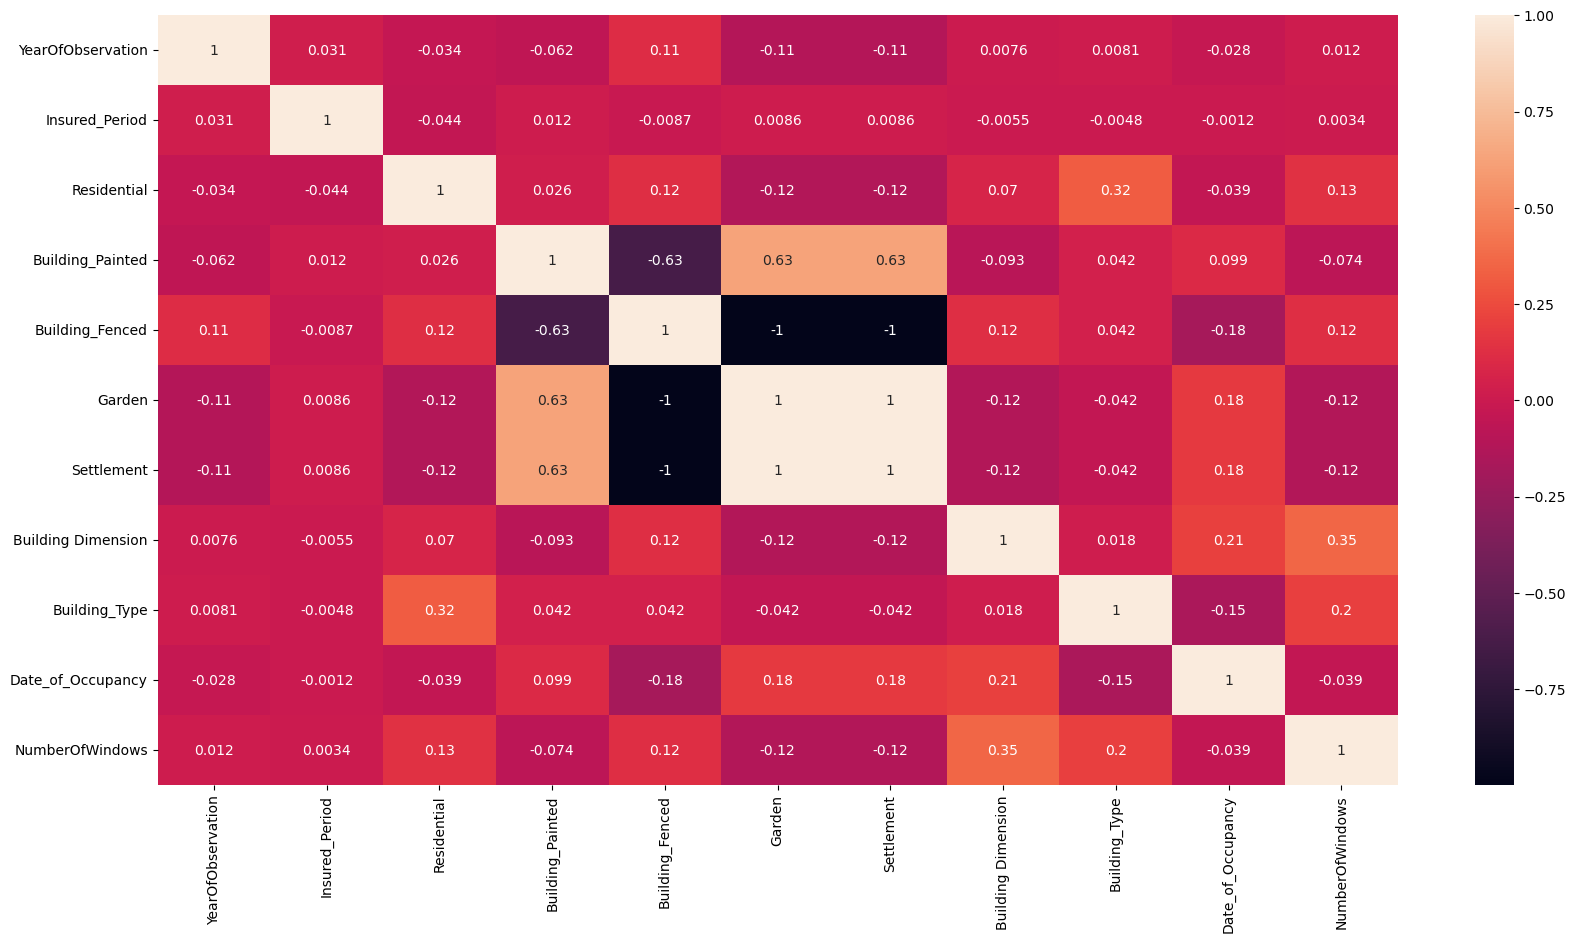

In [156]:
plt.figure(figsize=(20,10))
import seaborn as sb
sb.heatmap(x.corr(), annot=True)  

The features that do not have high correlation with each other are:Residential,Garden,Settlement,Building_Type and NumberOfWindows

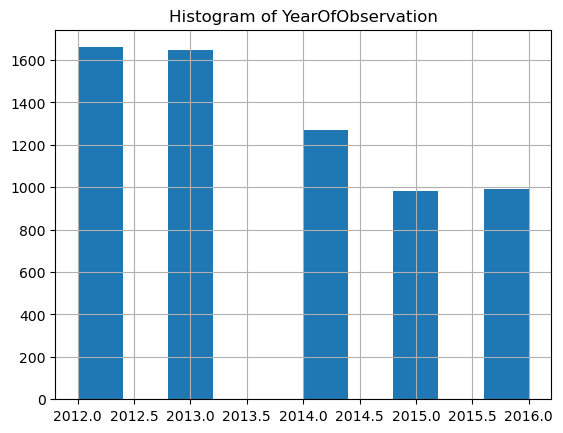

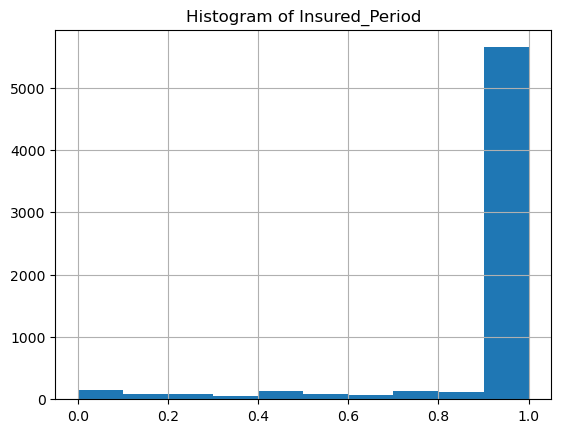

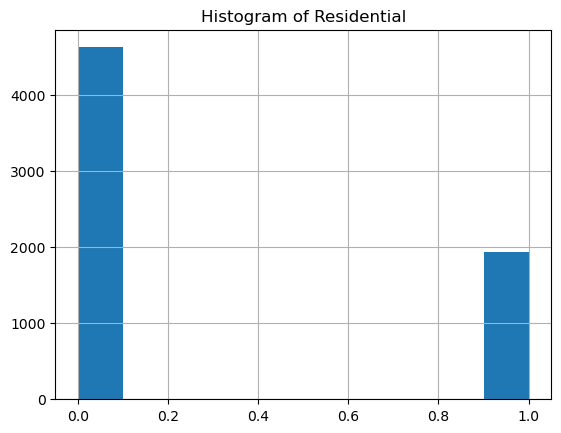

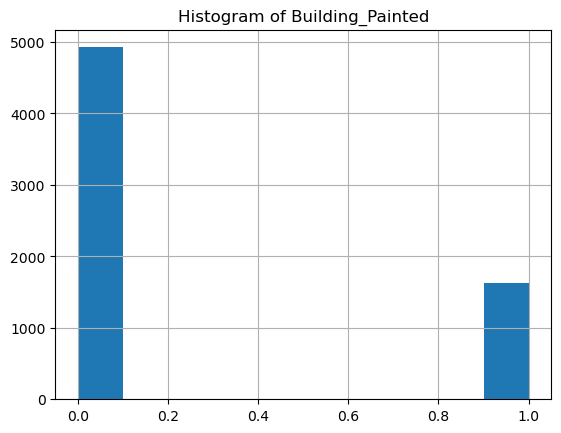

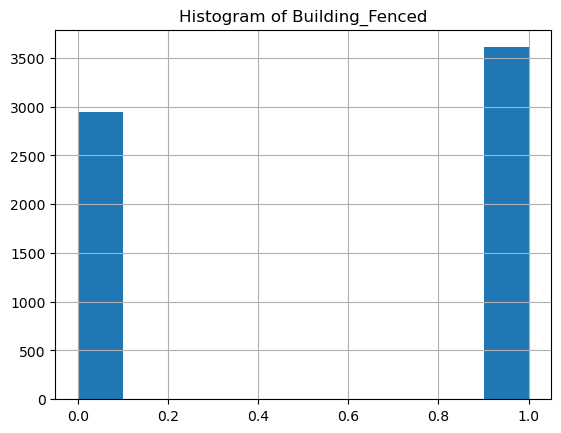

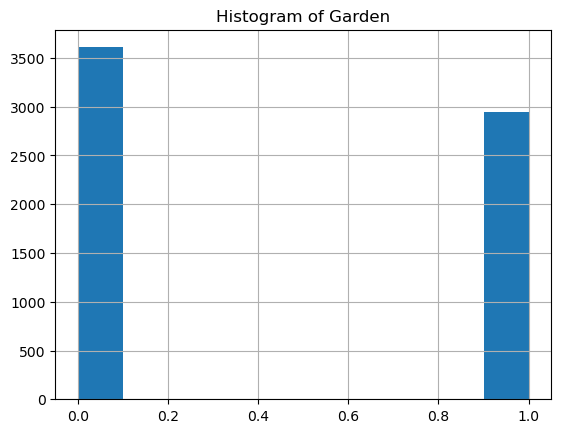

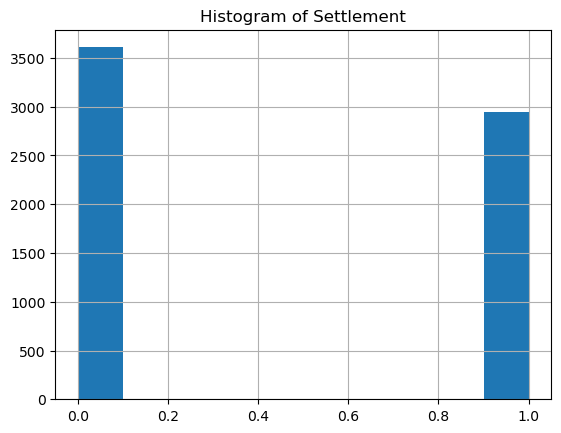

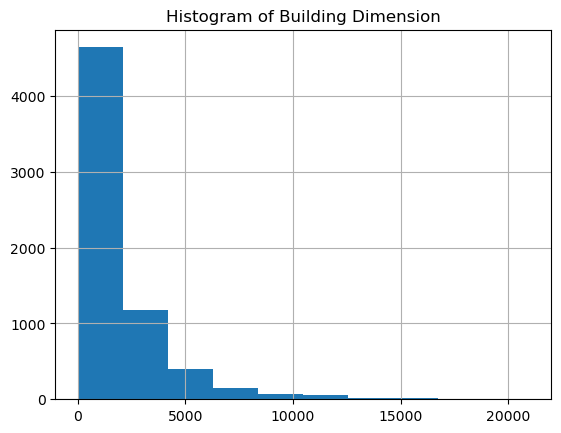

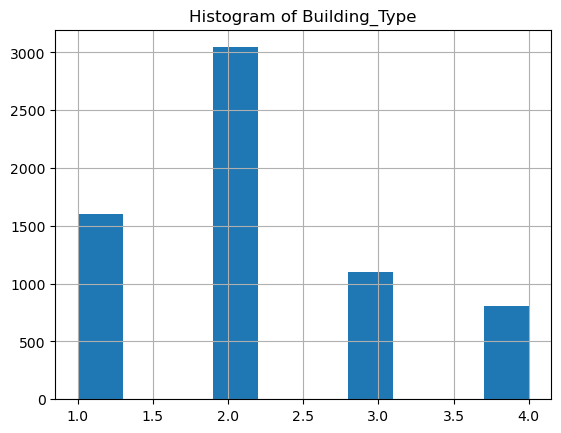

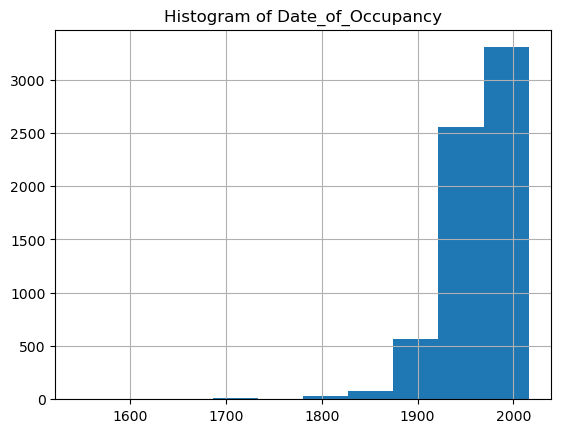

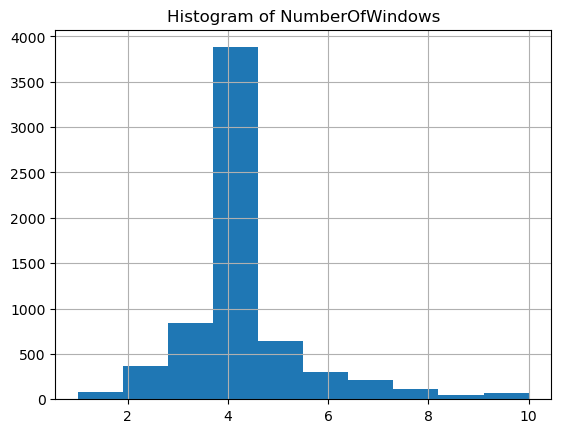

In [158]:
for col in x.columns:
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.show()

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs= SelectKBest(score_func=f_classif, k=3)
x_selected = fs.fit_transform(x,y)

In [160]:
cols_id = fs.get_support()
cols_id

array([False, False, False, False, False, False, False,  True,  True,
       False,  True])

In [161]:
x.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows'],
      dtype='object')

columns selected:Building Dimension,Building_Type,NumberOfWindows

In [163]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7053    0
7054    0
7055    0
7056    0
7057    0
Name: Claim, Length: 6550, dtype: int64

### Model Building

In [165]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [166]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()

model_log.fit(x_train, y_train)

LogisticRegression()

In [167]:
predictions = model_log.predict(x_test)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
y_test

5019    0
1428    1
4298    0
4010    0
6759    0
       ..
6395    1
4263    0
5485    0
4111    0
2625    0
Name: Claim, Length: 1310, dtype: int64

In [169]:
from sklearn.metrics import accuracy_score

print(f'Accuracy_score {accuracy_score(y_test, predictions)}')

Accuracy_score 0.8007633587786259
